In [39]:
import numpy as np
import networkx as nx

map16 = np.array([list(x) for x in open('input.txt').read().split()])
G = nx.Graph()
for x in np.ndindex(len(map16), len(map16[0])):
    if map16[x] in ['S', '.']:
        for o1, o2 in zip(['E', 'N', 'W', 'S'], ['N', 'W', 'S', 'E']):
            G.add_edge((x[0], x[1], o1), (x[0], x[1], o2), weight=1000)
        for s, d in zip([(0, -1), (-1, 0), (0, 1), (1, 0)], ['W', 'N', 'E', 'S']):
            if map16[x[0]+s[0], x[1]+s[1]] in ['S', '.']:
                G.add_edge((x[0], x[1], d), (x[0]+s[0], x[1]+s[1], d), weight=1)
            elif map16[x[0]+s[0], x[1]+s[1]] == 'E':
                G.add_edge((x[0], x[1], d), (x[0]+s[0], x[1]+s[1]), weight=1)

start = (np.where(map16 == 'S')[0][0], np.where(map16 == 'S')[1][0], 'E')
end = (np.where(map16 == 'E')[0][0], np.where(map16 == 'E')[1][0])

p = nx.shortest_path(G, start, end, weight="weight")
nx.path_weight(G, p, "weight")

122492

520

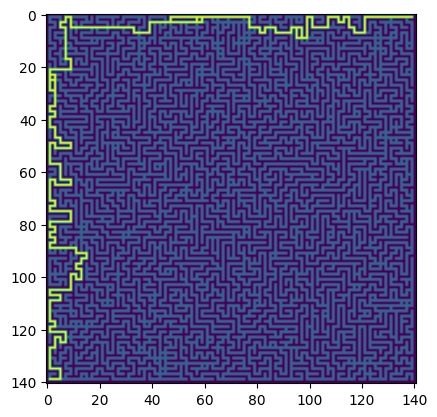

In [45]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

map16 = np.array([list(x) for x in open('input.txt').read().split()])
G = nx.DiGraph()

for x in np.ndindex(len(map16), len(map16[0])):
    if map16[x] in ['S', '.']:
        for o1, o2 in zip(['E', 'N', 'W', 'S'], ['N', 'W', 'S', 'E']):
            G.add_edge((x[0], x[1], o1), (x[0], x[1], o2), weight=1000)
        for s, d in zip([(0, -1), (-1, 0), (0, 1), (1, 0)], ['W', 'N', 'E', 'S']):
            if map16[x[0]+s[0], x[1]+s[1]] in ['S', '.']:
                G.add_edge((x[0], x[1], d), (x[0]+s[0], x[1]+s[1], d), weight=1)
            elif map16[x[0]+s[0], x[1]+s[1]] == 'E':
                G.add_edge((x[0], x[1], d), (x[0]+s[0], x[1]+s[1]), weight=1)

start = (np.where(map16 == 'S')[0][0], np.where(map16 == 'S')[1][0], 'E')
end = (np.where(map16 == 'E')[0][0], np.where(map16 == 'E')[1][0])

map_path = np.vectorize({'#': -1, '.':0, 'S':1, 'E':3}.get)(map16)

for p in nx.all_shortest_paths(G, start, end, weight="weight"):
    for x in p:
        map_path[x[0], x[1]] = 2
fig, ax = plt.subplots()
ax.imshow(map_path)
len(np.where(map_path == 2)[0])